Devoir de maison Machine learning  
groupe: Bekda Lilia, Boukhemis Imene, Boucherrab Meziane
-----------------------------------------------------------------------------

Exercice 2: 
---------------------------

Question 1
---------------------------


In [2]:
# Importation des bibliotheques
# Import the numpy and pandas package
# numpy : calculs
#pandas : ~ dplyr
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#Stats
from scipy import stats
import statsmodels.api as sm

# ML
from sklearn import linear_model
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

import xgboost as xgb




import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


import os
cwd = os.getcwd()
print(cwd)

c:\Users\lilia\Machien Learning


In [3]:
# Lecture des données
data_meteo = pd.read_csv('depSeuil.dat', decimal='.', delimiter=',') 
print("la taille du jeu de données est : ", len(data_meteo))
print(data_meteo.isnull().all())  #verification de l'existance des valeurs manquantes
data_meteo.head()                 #apperçu des données


la taille du jeu de données est :  1041
JOUR       False
O3obs      False
MOCAGE     False
TEMPE      False
RMH2O      False
NO2        False
NO         False
STATION    False
VentMOD    False
VentANG    False
dtype: bool


,JOUR,O3obs,MOCAGE,TEMPE,RMH2O,NO2,NO,STATION,VentMOD,VentANG
0,1,91,93.2,21.5,0.00847,1.602,0.424,Aix,9.5000,-0.64350
1,1,100,104.6,20.2,0.00881,2.121,0.531,Aix,8.0100,-0.04996
2,0,82,103.6,17.4,0.00951,1.657,0.467,Aix,9.3771,-0.12832
3,0,94,94.8,18.8,0.00855,2.350,0.701,Aix,9.4578,-0.34516
4,0,107,99.0,23.7,0.00731,1.653,0.452,Aix,7.8791,-0.41822


In [4]:
# Afficher les types de données avant conversion
print(data_meteo.dtypes)

JOUR         int64
O3obs        int64
MOCAGE     float64
TEMPE      float64
RMH2O      float64
NO2        float64
NO         float64
STATION     object
VentMOD    float64
VentANG    float64
dtype: object


In [5]:
# Vérification du contenu
print(data_meteo.describe())

              JOUR        O3obs       MOCAGE        TEMPE        RMH2O  \
count  1041.000000  1041.000000  1041.000000  1041.000000  1041.000000   
mean      0.304515   115.400576   127.219693    23.883381     0.010251   
std       0.460423    40.999155    39.820186     5.217462     0.003731   
min       0.000000    19.000000    46.400000    10.400000     0.002850   
25%       0.000000    87.000000    97.500000    20.200000     0.007630   
50%       0.000000   109.000000   125.600000    23.800000     0.009850   
75%       1.000000   135.000000   153.600000    27.600000     0.012440   
max       1.000000   319.000000   284.700000    38.000000     0.027530   

               NO2           NO      VentMOD      VentANG  
count  1041.000000  1041.000000  1041.000000  1041.000000  
mean      3.504645     0.657417     5.907186     0.163111  
std       4.043308     0.844180     3.054307     0.708288  
min       0.258000     0.001000     0.141420    -1.570790  
25%       1.248000     0.236000  

In [6]:
# Convertir les colonnes en variables qualitatives
data_meteo['JOUR'] = pd.Categorical(data_meteo['JOUR'])
data_meteo['STATION'] = pd.Categorical(data_meteo['STATION'])

# convertir les variables categorielles en variables binaires avec dummies pour simplifier la conversion en numerique

data_meteo = pd.get_dummies(data_meteo, columns=['JOUR'])
data_meteo = pd.get_dummies(data_meteo, columns=['STATION'])

# Afficher les types de données après conversion
print(data_meteo.dtypes)

O3obs            int64
MOCAGE         float64
TEMPE          float64
RMH2O          float64
NO2            float64
NO             float64
VentMOD        float64
VentANG        float64
JOUR_0            bool
JOUR_1            bool
STATION_Aix       bool
STATION_Als       bool
STATION_Cad       bool
STATION_Pla       bool
STATION_Ram       bool
dtype: object


Question 2:
-----------------------------


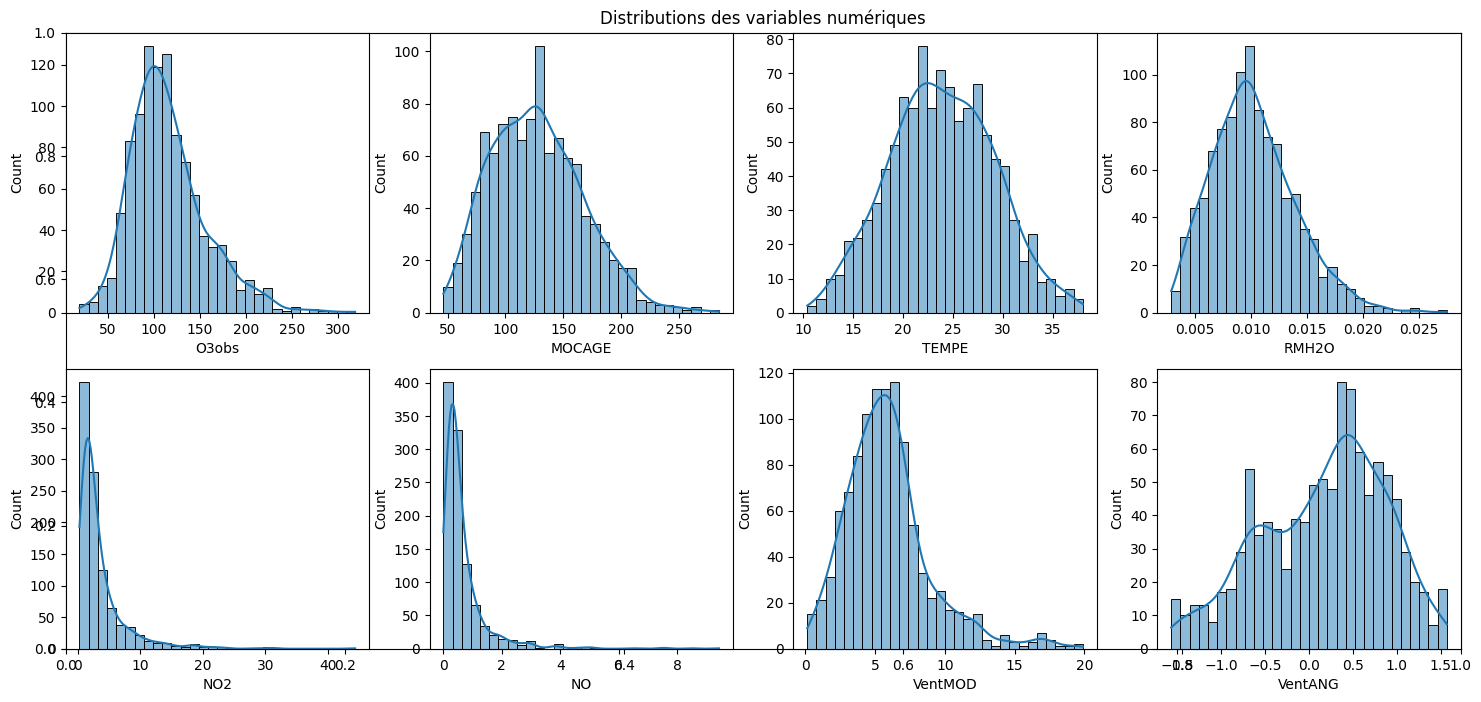

In [7]:
# Présentations graphiques des données

# Histogramme pour une variable numérique
plt.figure(figsize=(18, 8))
plt.figure(1)
plt.title('Distributions des variables numériques')
plt.subplot(2,4,1)
sns.histplot(data_meteo['O3obs'], bins=30, kde=True)
plt.subplot(2,4,2)
sns.histplot(data_meteo['MOCAGE'], bins=30, kde=True)
plt.subplot(2,4,3)
sns.histplot(data_meteo['TEMPE'], bins=30, kde=True)
plt.subplot(2,4,4)
sns.histplot(data_meteo['RMH2O'], bins=30, kde=True)
plt.subplot(2,4,5)
sns.histplot(data_meteo['NO2'], bins=30, kde=True)
plt.subplot(2,4,6)
sns.histplot(data_meteo['NO'], bins=30, kde=True)
plt.subplot(2,4,7)
sns.histplot(data_meteo['VentMOD'], bins=30, kde=True)
plt.subplot(2,4,8)
sns.histplot(data_meteo['VentANG'], bins=30, kde=True)
#plt.xlabel('Valeurs')
#plt.ylabel('Fréquence')

plt.show()


On constate que les variables RMH2O, NO2, NO et ventMOD ne sont pas symetriques, et donc pas gaussiennes.
on va alors les normaliser comme suit:

In [8]:
data_meteo['sqrt_RMH2O'] = np.sqrt(data_meteo['RMH2O'])
data_meteo['log_NO2'] = np.log(data_meteo['NO2'])
data_meteo['log_NO'] = np.log(data_meteo['NO'])
data_meteo['log_VentMOD'] = np.log(data_meteo['VentMOD'])
data_meteo = data_meteo.drop(['RMH2O', 'NO2', 'NO', 'VentMOD'], axis = 1)
data_meteo.head()

,O3obs,MOCAGE,TEMPE,VentANG,JOUR_0,JOUR_1,STATION_Aix,STATION_Als,STATION_Cad,STATION_Pla,STATION_Ram,sqrt_RMH2O,log_NO2,log_NO,log_VentMOD
0,91,93.2,21.5,-0.64350,False,True,True,False,False,False,False,0.092033,0.471253,-0.858022,2.251292
1,100,104.6,20.2,-0.04996,False,True,True,False,False,False,False,0.093862,0.751888,-0.632993,2.080691
2,82,103.6,17.4,-0.12832,True,False,True,False,False,False,False,0.097519,0.505009,-0.761426,2.238271
3,94,94.8,18.8,-0.34516,True,False,True,False,False,False,False,0.092466,0.854415,-0.355247,2.246840
4,107,99.0,23.7,-0.41822,True,False,True,False,False,False,False,0.085499,0.502592,-0.794073,2.064214


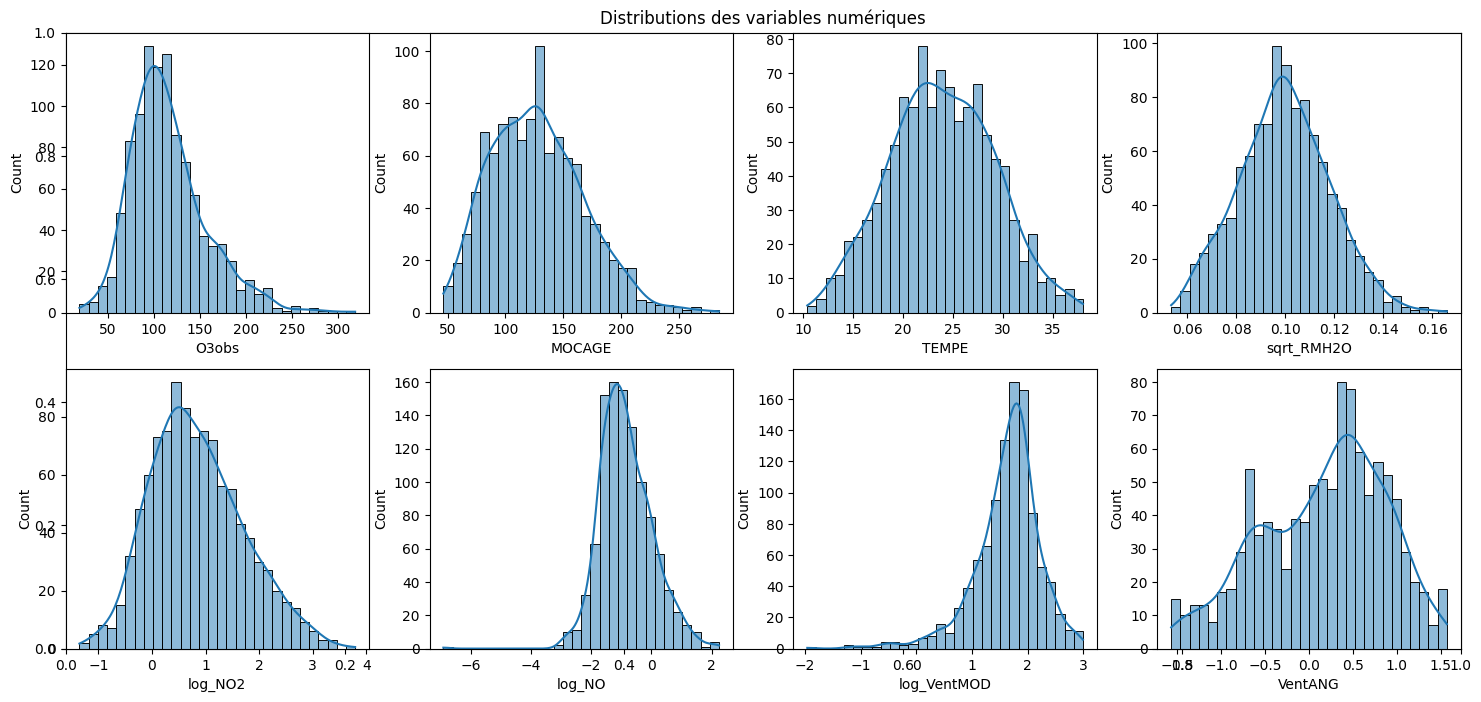

In [18]:
# Présentations graphiques des données

# Histogramme pour une variable numérique
plt.figure(figsize=(18, 8))
plt.figure(1)
plt.title('Distributions des variables numériques')
plt.subplot(2,4,1)
sns.histplot(data_meteo['O3obs'], bins=30, kde=True)
plt.subplot(2,4,2)
sns.histplot(data_meteo['MOCAGE'], bins=30, kde=True)
plt.subplot(2,4,3)
sns.histplot(data_meteo['TEMPE'], bins=30, kde=True)
plt.subplot(2,4,4)
sns.histplot(data_meteo['sqrt_RMH2O'], bins=30, kde=True)
plt.subplot(2,4,5)
sns.histplot(data_meteo['log_NO2'], bins=30, kde=True)
plt.subplot(2,4,6)
sns.histplot(data_meteo['log_NO'], bins=30, kde=True)
plt.subplot(2,4,7)
sns.histplot(data_meteo['log_VentMOD'], bins=30, kde=True)
plt.subplot(2,4,8)
sns.histplot(data_meteo['VentANG'], bins=30, kde=True)
#plt.xlabel('Valeurs')
#plt.ylabel('Fréquence')

plt.show()


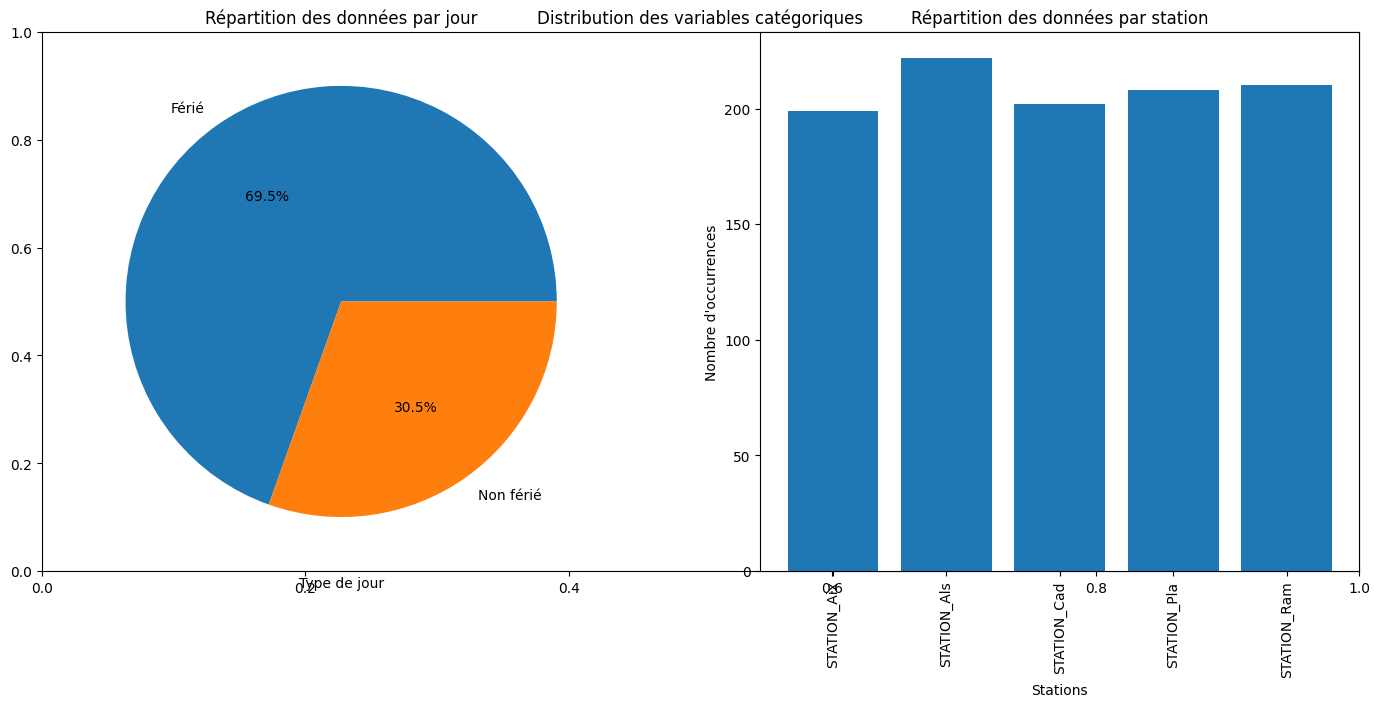

In [23]:

# Diagramme en barres pour une variable catégorielles
plt.figure(figsize=(17, 7))
# plt.title('Distribution des variables catégorielles')

plt.subplot(1,2,1)
data_meteo['JOUR_0'].value_counts().plot(kind='pie', autopct='%1.1f%%', labels = ['Férié', 'Non férié'])
plt.xlabel('Type de jour')
plt.ylabel('')
plt.title('Répartition des données par jour')

plt.subplot(1,2,2)
# Calculer le nombre d'occurrences de chaque station
station_counts = data_meteo.filter(like='STATION_').sum()

# Créer un diagramme à barres
plt.bar(station_counts.index, station_counts.values)
plt.xlabel('Stations')
plt.ylabel('Nombre d\'occurrences')
plt.title('Répartition des données par station')
plt.xticks(rotation=90)  # Rotation des étiquettes pour une meilleure lisibilité
plt.show()


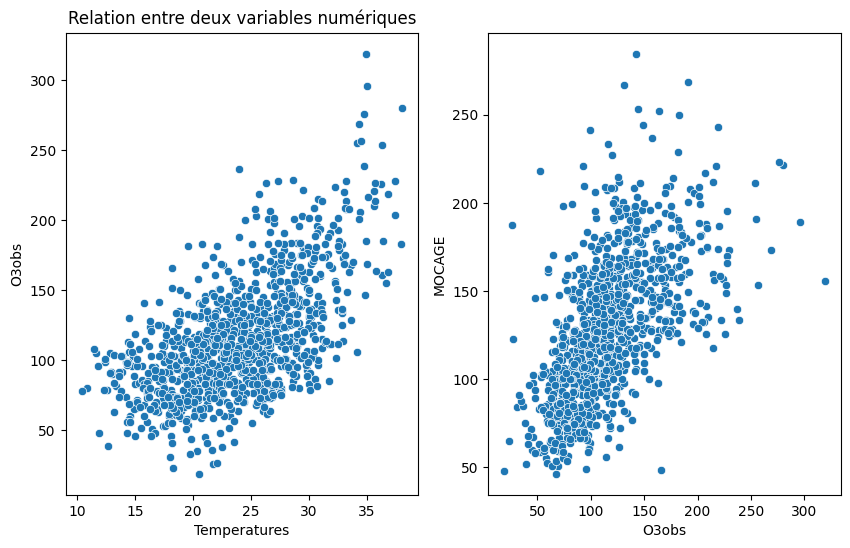

In [24]:
# Diagramme de dispersion pour deux variables numériques
plt.figure(figsize=(10, 6))
plt.subplot(1,2,1)
sns.scatterplot(x=data_meteo['TEMPE'], y=data_meteo['O3obs'], data = data_meteo)
plt.title('Relation entre deux variables numériques')
plt.xlabel('Temperatures')
plt.ylabel('O3obs')

plt.subplot(1,2,2)
sns.scatterplot(x=data_meteo['O3obs'], y=data_meteo['MOCAGE'], data = data_meteo)
plt.show()


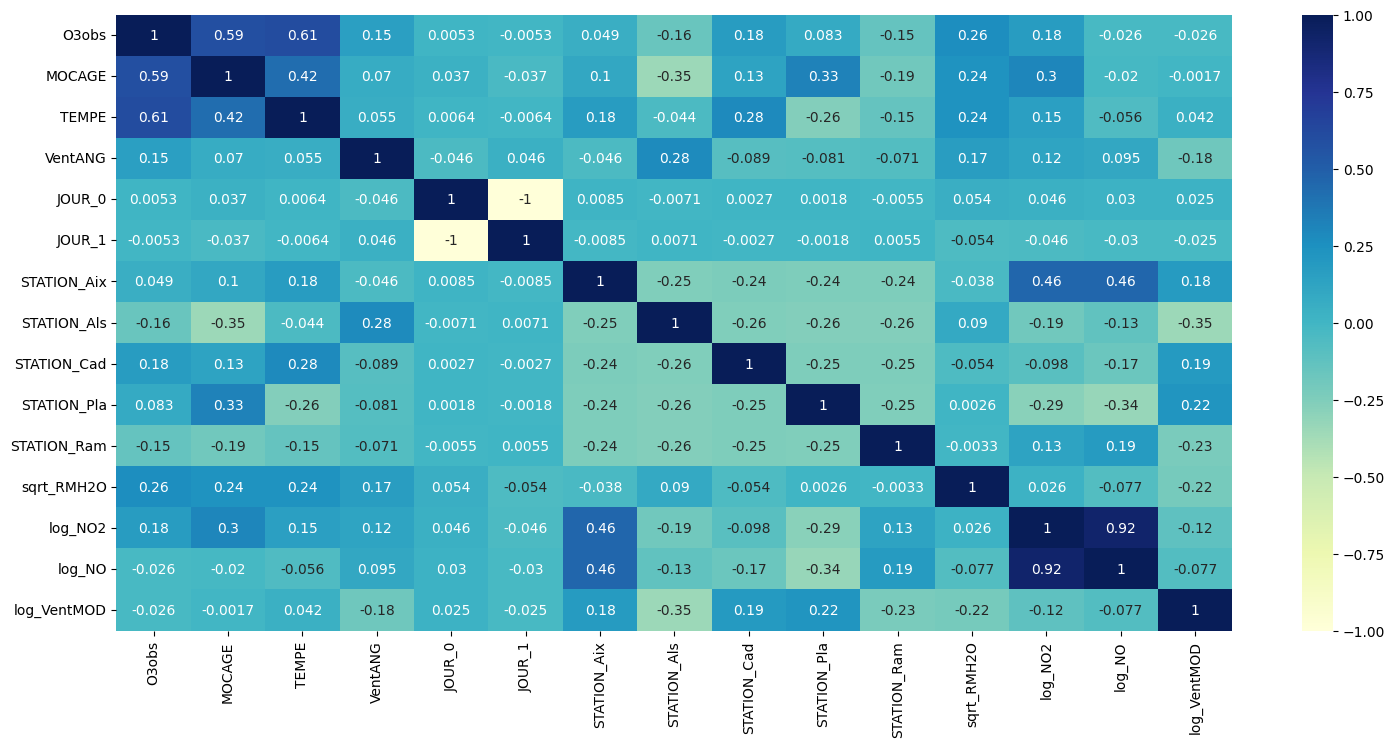

In [26]:
#correlation
plt.figure(figsize=(18, 8))
sns.heatmap(data_meteo.corr(), cmap="YlGnBu", annot = True)
plt.show()

On constate une forte corellation entre les variables NO2 et NO qui sont des variables liées à la concentration de dioxyde d’azote (NO2) et d’oxyde d’azote (NO). Elles sont souvent utilisées pour évaluer la qualité de l’air et les émissions polluantes.
On constate egalement que notre variable cible O3obs est correlé avec les variables TEMPE et MOCAGE, mais faiblement correlée avec le reste des variables. Ceci peut être utile pour l'application des modèles de régression dans la suite de l'exercice

On remarque par ailleurs que la variable O3obs est :

1. **Moyennement** corrélée avec les variables MOCAGE, TEMPE avce des coefficients de 0.59 e 0.61 respectivement.
2. **Légerement** corrélée avec les variables VentANG, log_NO2, STATION_ALS, STATION_Cad, STATION_Ram, et sqrt_RMH2O.
3. **Faiblement** corrélée avec JOUR80, JOUR_1, STATION_Aix, STATION_Pla, log_NO et loh_VentMOD.

    Ces corrélation peuvent s'expliquer logiquement, en effet, le type du jour(ferié ou pas), n'a pas d'impacte sur la concentration en Ozone, mais le lien avec la station est également logique, la concentration peut différer selon l'altitude ou l'endroit où les études ont été faites.

Question 3: 
-----------------------------------
#### Modèle 1 : Régression linéaire multiple avec toutes les variables 

In [9]:
# Fit the regression

#conversion des variables catégorielles booléenes en float
data_meteo['JOUR_0'] = data_meteo['JOUR_0'].astype(float)
data_meteo['JOUR_1'] = data_meteo['JOUR_1'].astype(float)
data_meteo['STATION_Aix'] = data_meteo['STATION_Aix'].astype(float)
data_meteo['STATION_Als'] = data_meteo['STATION_Als'].astype(float)
data_meteo['STATION_Cad'] = data_meteo['STATION_Cad'].astype(float)
data_meteo['STATION_Pla'] = data_meteo['STATION_Pla'].astype(float)
data_meteo['STATION_Ram'] = data_meteo['STATION_Ram'].astype(float)


list_var = data_meteo.columns.drop(['O3obs'])
y = data_meteo.O3obs            #variable cible
X = data_meteo[list_var]        # variables explicatives
X = sm.add_constant(X)          # ajout d'une colonne constante 
np.asarray(X)                   # conversion en array
np.asarray(y)

M1 = sm.OLS(y, X)               # application de OLS pour la regression linéaire
regM1 = M1.fit()
print(regM1.summary())          # affichage des résultats de la regression 


                            OLS Regression Results                            
Dep. Variable:                  O3obs   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.538
Method:                 Least Squares   F-statistic:                     102.1
Date:                Thu, 18 Apr 2024   Prob (F-statistic):          9.32e-166
Time:                        22:23:07   Log-Likelihood:                -4933.9
No. Observations:                1041   AIC:                             9894.
Df Residuals:                    1028   BIC:                             9958.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -5.8368      4.434     -1.316      

In [10]:

ypred = regM1.predict(X) 
# print('ypred : ',ypred)
RMSE_M1 = np.sqrt(((y-ypred)**2).sum()/len(y))  #Calcul du RMSE (Root Mean Squared Error, Erreur quadratique moyenne)
print('RMSE_M1 : ',RMSE_M1)


RMSE_M1 :  27.678231307226486


#### Interprétation des résultats pour le modèle 1

**Ajustement du modèle**

R-squared (0.544): Le coefficient de détermination indique que 54.4% de la variance de la concentration en ozone est expliquée par les variables explicatives du modèle.
Adjusted R-squared (0.538): L'ajustement R-squared prend en compte le nombre de variables explicatives et est légèrement inférieur au R-squared. Cela suggère que le modèle est raisonnablement bon sans sur-ajustement important.

**Test de signification globale (F-statistic)**

F-statistic (102.1) et Prob (F-statistic) (3.45e-43): Le test F est très significatif (p-value < 0.05), ce qui signifie que le modèle global est statistiquement significatif. En d'autres termes, au moins une des variables explicatives a un effet significatif sur la concentration en ozone.

**Coefficients de régression**

Le tableau présente les coefficients de régression pour chaque variable explicative. On suppose pour la régression que la relation entre les variables est linéaire et qu'il n'y a pas de colinéarité entre les variables explicatives. Si le coefficient est positif, une augmentation de la variable explicative est associée à une augmentation de la concentration en ozone. (e.g., MOCAGE, TEMPE, VentANG, logNO, sqrt_RMH2O). S'il est négatif, une augmentation de la variable explicative est associée à une diminution de la concentration en ozone. (e.g., log_NO2, const, log_VentMOD). La grandeur du coefficient indique la force relative de l'association. Les coefficients sont particulièrement élevés pour sqrt_RMH2O, log_NO2 et log_NO. La valeur élevée de sqrt_RMH2O est à prendre avec précaution car l'erreur standard correspondant à cette variable est très élevée également. 
En se basant sur les p-values associée à chaque coefficient (une valeur inférieure à 0.05 suggère un effet significatif), on peut conclure que toutes les variables, sauf log_VentMOD, ont un effet statistiquement significatif sur la concentration en ozone. Cette variable est cependant assez proche de 0.05 avec 0.052, on pourrait la considérée significative comme les autre.


**Autres tests de diagnostic**

Omnibus et Prob(Omnibus): Le test d'Omnibus est significatif (p-value < 0.05), ce qui pourrait indiquer une non-normalité des erreurs.
Jarque-Bera (JB): La valeur de Jarque-Bera est également significative, renforçant l'idée d'une non-normalité des erreurs.

Durbin-Watson: Il s'agit d'un test de l'autocorrélation des résidus. Une valeur proche de 2 suggère une absence d'autocorrélation.

Cond. No.: Il s'agit du nombre conditionnel, qui mesure la sensibilité de l'estimation du modèle aux petites modifications dans les données. Des valeurs élevées peuvent indiquer un problème de multicollinéarité.

**Conclusion**

Le modèle de régression linéaire multiple semble expliquer une part significative de la variance de la concentration en ozone. Les variables explicatives ont un effet statistiquement significatif sur la variable cible. Cependant, il est important de tenir compte de la non-normalité potentielle des erreurs pour s'assurer de la validité des résultats. Des analyses complémentaires pourraient être nécessaires pour vérifier les hypothèses du modèle et explorer d'autres options de modélisation si nécessaire.

#### Modèle 2 : Régression linéaire multiple avec 4 variables numériques

In [11]:
X = data_meteo[[ "MOCAGE", "TEMPE" , "sqrt_RMH2O" , "log_NO2"]]
X = sm.add_constant(X)

M2 = sm.OLS(y, X)
regM2 = M2.fit()
print(regM2.summary())

# Root mean square error
ypred = regM2.predict(X)
#print('ypred : ',ypred)
RMSE_M2 = np.sqrt(((y-ypred)**2).sum()/len(y))
print('RMSE_M2 : ',RMSE_M2)

                            OLS Regression Results                            
Dep. Variable:                  O3obs   R-squared:                       0.512
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     271.6
Date:                Thu, 18 Apr 2024   Prob (F-statistic):          1.22e-159
Time:                        22:23:16   Log-Likelihood:                -4969.1
No. Observations:                1041   AIC:                             9948.
Df Residuals:                    1036   BIC:                             9973.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -31.4759      5.792     -5.434      0.0

#### Interprétation des résultats pour le modèle 2
Ce modèle utilise 4 variables explicatives contre 7 dans le modèle précédent. Seules les variables MOCAGE, TEMPE, sqrt_RMH2O, et log_NO2 sont conservées dans ce modèle. La réduction du nombre de variables peut simplifier le modèle et potentiellement réduire le risque de surajustement.

Ici const = -31,4759.

**Ajustement du modèle**

Le R-squared a légèrement baissé, passant de 0.531 à 0.512. Cela suggère que le modèle précédent capturait peut-être un peu plus de variance de la concentration en ozone. Cependant, l'écart est faible et la différence d'ajustement pourrait ne pas être significative.

Test de signification globale (F-statistic):

Le F-statistic est toujours très significatif (p-value < 0.05), confirmant la validité globale du modèle.

**Coefficients de régression**

L'interprétation des coefficients reste similaire au modèle précédent pour les quatre variables considérées. Les variables log_VentMOD, VentANG, et log_NO ont été supprimées, suggérant qu'elles n'apportaient pas d'amélioration significative au modèle par rapport aux autres variables.

**Tests de diagnostic**

Les tests d'Omnibus, de Jarque-Bera et la mesure de skewness indiquent toujours une potentielle non-normalité des erreurs.

On a toujours un problème de collinéarité des variables, ce qui peut être mauvais pour le choix du modèle.

**Conclusion**

Ce modèle à 4 variables explicatives semble être une alternative intéressante au modèle précédent. Il offre un ajustement légèrement inférieur, mais avec un nombre réduit de variables, ce qui peut être bénéfique pour la simplicité et la robustesse du modèle. Cependant, la non-normalité potentielle des erreurs reste un point à adresser pour s'assurer de la validité des résultats.

#### Modèle 3 : Régression linéaire multiple avec 2 variables numériques

In [12]:
X = data_meteo[[ "MOCAGE", "TEMPE" ]]
X = sm.add_constant(X)

M3 = sm.OLS(y, X)
regM3 = M3.fit()
print(regM3.summary())

# Root mean square error
ypred = regM3.predict(X)
#print('ypred : ',ypred)
RMSE_M3 = np.sqrt(((y-ypred)**2).sum()/len(y))
print('RMSE_M3 : ',RMSE_M3)

                            OLS Regression Results                            
Dep. Variable:                  O3obs   R-squared:                       0.507
Model:                            OLS   Adj. R-squared:                  0.506
Method:                 Least Squares   F-statistic:                     534.6
Date:                Thu, 18 Apr 2024   Prob (F-statistic):          2.56e-160
Time:                        22:23:21   Log-Likelihood:                -4973.9
No. Observations:                1041   AIC:                             9954.
Df Residuals:                    1038   BIC:                             9969.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -19.9213      4.365     -4.564      0.0

#### Interprétation des résultats pour le modèle 3
Ce nouveau modèle de régression linéaire multiple utilise seulement deux variables explicatives : MOCAGE et TEMPE pour prédire la concentration en ozone O3obs. Ce modèle est le plus simple des trois, utilisant seulement deux variables. Cela réduit la complexité du modèle et le risque de surajustement. Les autres variables ont été exclues du modèle car elles n'apportaient pas d'amélioration significative par rapport à MOCAGE et TEMPE.

**Ajustement du modèle**

Le R-squared (0.507) est légèrement inférieur à celui des modèles précédents (0.512 et 0.531). Cela signifie que ces deux variables capturent un peu moins de la variance de la concentration en ozone.

**Test de signification globale (F-statistic)**

Le F-statistic est toujours très significatif (p-value < 0.05), indiquant que le modèle global est statistiquement significatif. En d'autres termes, au moins une des variables explicatives a un effet significatif sur la concentration en ozone.

**Coefficients de régression**

L'interprétation des coefficients de MOCAGE et TEMPE reste similaire aux modèles précédents. Au vu des coefficients positifs, une augmentation de l'humidité de l'air et une hausse de la température seraient associées à une augmentation de la concentration en ozone.

**Tests de diagnostic**

Les tests d'Omnibus, de Jarque-Bera et la mesure de skewness indiquent toujours une potentielle non-normalité des erreurs.

**Conclusion**

Ce modèle simple à deux variables offre un compromis intéressant entre ajustement et complexité. Il est plus facile à interpréter et moins susceptible au surajustement que les modèles précédents. Cependant, la non-normalité potentielle des erreurs reste un point à considérer.


#### Normalité des résidus des modèles

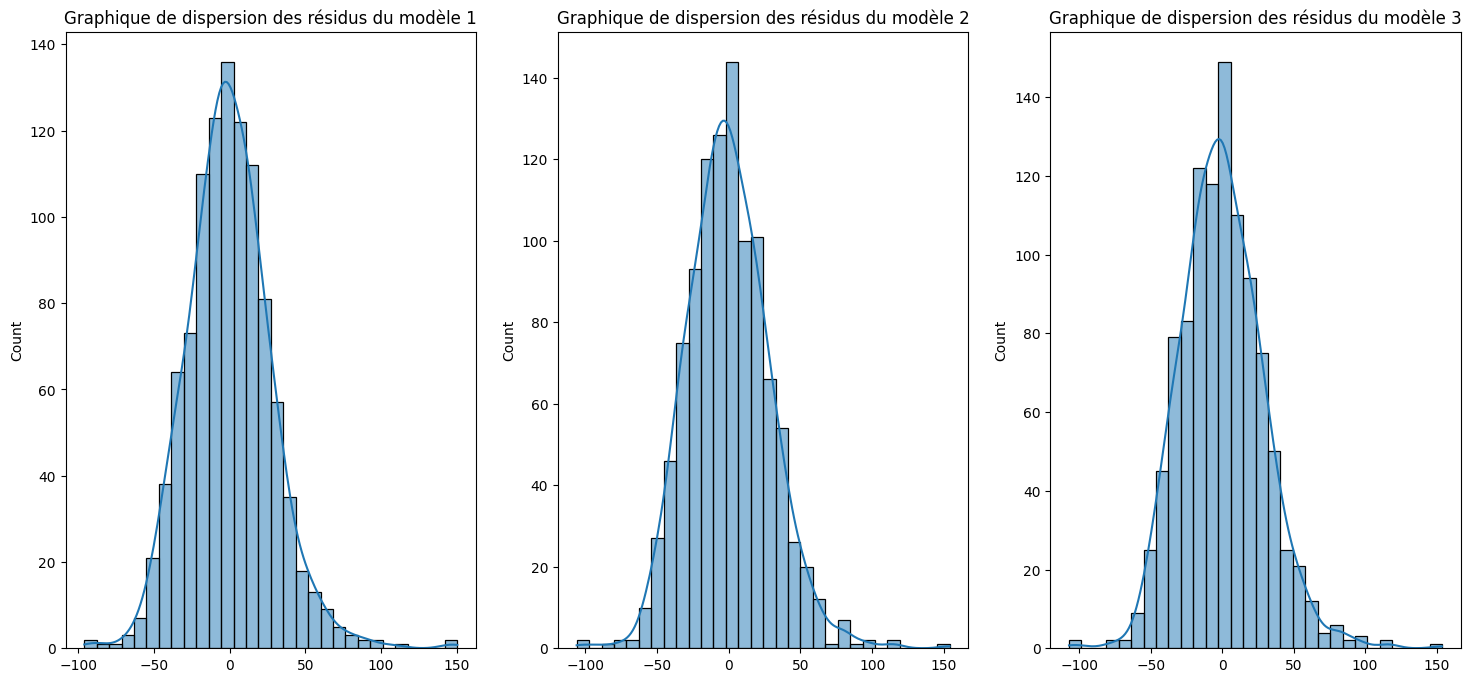

In [13]:

# Récupérer les résidus
residuals1 = regM1.resid

# Visualiser les résidus avec un graphique de dispersion
plt.figure(figsize=(18, 8))
plt.subplot(1, 3 , 1)
sns.histplot(residuals1, bins=30, kde=True)
plt.title('Graphique de dispersion des résidus du modèle 1')

# Récupérer les résidus
residuals2 = regM2.resid

# Visualiser les résidus avec un graphique de dispersion
plt.subplot(1, 3 , 2)
sns.histplot(residuals2, bins=30, kde=True)
plt.title('Graphique de dispersion des résidus du modèle 2')

# Récupérer les résidus
residuals3 = regM3.resid

# Visualiser les résidus avec un graphique de dispersion
plt.subplot(1, 3 , 3)
sns.histplot(residuals3, bins=30, kde=True)
plt.title('Graphique de dispersion des résidus du modèle 3')
plt.show()




<Figure size 1800x800 with 0 Axes>

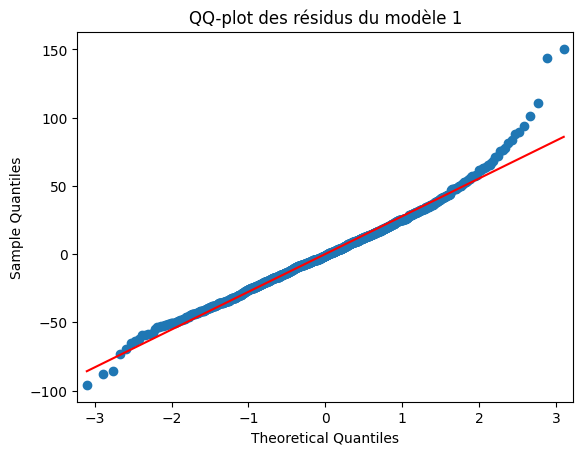

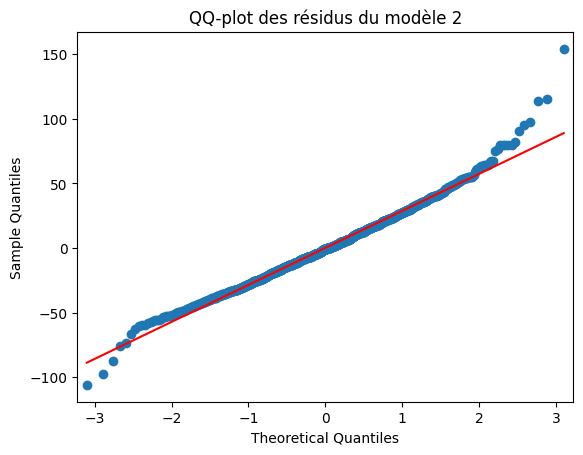

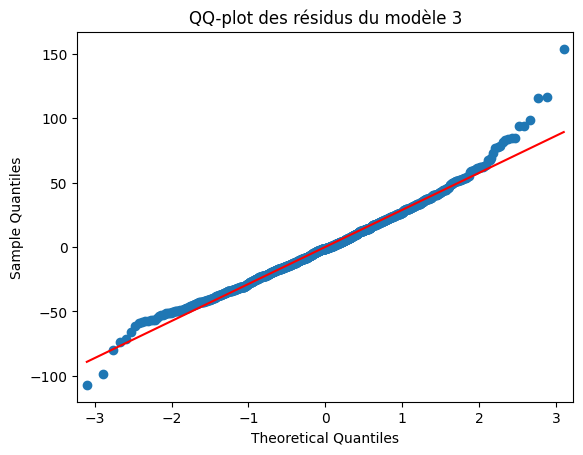

In [32]:
plt.figure(figsize=(18, 8))
#plt.subplot(1, 3 , 1)
sm.qqplot(residuals1, line='s')
plt.title('QQ-plot des résidus du modèle 1')
plt.show()

#plt.subplot(1, 3 , 2)
sm.qqplot(residuals2, line='s')
plt.title('QQ-plot des résidus du modèle 2')
plt.show()

#plt.subplot(1, 3 , 3)
sm.qqplot(residuals3, line='s')
plt.title('QQ-plot des résidus du modèle 3')
plt.show()

#### Choix du modèle final : 

**Priorité sur l'ajustement vs. la simplicité**

Si on a besoin du modèle le plus précis pour prédire la concentration en ozone, le modèle utilisant toutes les variables pourrait être le meilleur choix (bien qu'il ait un ajustement légèrement meilleur, la différence est faible).
Si la simplicité et l'interprétabilité sont plus importantes, le modèle à 2 variables est une option attrayante sans problème de collinéarité des variables.

Comme la non-normalité des erreurs est confirmée, des techniques de transformation des données ou des modèles alternatifs (par exemple, des régressions plus robustes) peuvent être nécessaires pour obtenir des résultats plus fiables.
En affichant la distributions des résidus ainsi que les QQ-plots en constate que les résidus ne sont pas gaussiens, les modèles de régressions choisis peuvent être améliorés dans ce cas. Reste alors à choisir le meilleurs modèle suivant certains critères.

Voici une procédure générale pour choisir le meilleur modèle :

[Analyser les critères d'information (AIC et BIC) : On choisit le modèle avec le AIC et le BIC les plus bas, se sont des mesures qui prénnent en considzration l'ajustement et la compléxité du modèle.
Analyser les résidus : Les résidus devraient être distribués de manière aléatoire autour de zéro, tendant vers une distruvition gaussienne.] -> on les a pas considéré

Rappel des modèles:

Modèle 1: 7 variables explicatives (R-squared: 0.544, R-squared ajusté : 0.538, RMSE_M1 :  27.678231307226486)

Modèle 2: 4 variables explicatives (R-squared: 0.512, R-squared ajusté :  0.510, RMSE_M2 :  28.63077390203018)

Modèle 3: 2 variables explicatives (R-squared: 0.507, R-squared ajusté : 0.506, RMSE_M3 :  28.76186179650514)


**Comparaison des R-squared**

On choisis les modèles avec les R-squared les plus élevées. Le modèle 1 a le R-squared le plus élevé, suivi du modèle 2 et du modèle 3. Cependant, la différence de R-squared entre les modèles 1 et 2 est faible (0.019), et encore plus faible entre les modèles 2 et 3 (0.005).
**Comparaison des RMSE**
On choisi le modèle qui a la RMSE la plus faible, c'est une mesure qui permet de comparer les performances des prédictions des différents types de modèles. Cependant, la différences des 3 modèles n'est pas significatives dans notre cas.

**Test de significativité des variables**

Dans tous les modèles, les variables MOCAGE et TEMPE sont significatives. D'autres variables sont significatives dans le modèle 1, mais pas dans les modèles 2 et 3.

**Choix du modèle**

Le gain d'ajustement en passant du modèle 3 au modèle 2 est très faible (0.004), et ne justifie pas l'ajout de deux variables supplémentaires.
Le gain d'ajustement en passant du modèle 2 au modèle 1 est également faible (0.034), et les variables supplémentaires du modèle 1 ne sont pas toutes significatives.
Le modèle 3 est le plus simple et le plus facile à interpréter.

En tenant compte de tous ces éléments, le modèle 3 semble être un bon choix. Il est le plus simple, tout en conservant un ajustement correct et en ne négligeant aucune variable significative.


Question 4:
------------------------------------------

In [14]:
# Construction des échantillons pour la régression (prévision de la concentration)
# Graine aléatoire
rd_seed = 42  # On peut changer cette valeur


# Sélectionner les colonnes numériques à mettre à l'échelle
numeric_features = data_meteo.drop(['JOUR_0', 'JOUR_1'], axis=1).columns
#numeric_features = data_meteo.columns

# Définir les transformations à appliquer à chaque type de colonnes
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),  # Mise à l'échelle des variables numériques
    ])

# Appliquer les transformations
data_transformed = preprocessor.fit_transform(data_meteo)

# Convertir le résultat en DataFrame
data_transformed_df = pd.DataFrame(data_transformed, columns=list(numeric_features))

# Séparer les variables explicatives (X) et la variable cible (y)
y = data_transformed_df['O3obs']
#data_transformed_df = pd.get_dummies(data_transformed_df, columns=['STATION'])  # Transform 'STATION' into indicator variables
X = data_transformed_df.drop(['O3obs'], axis=1)


# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rd_seed)


#### Modèle Random Forest :

In [15]:
# Initialiser et entraîner le modèle de forêt aléatoire
model_random_forest = RandomForestRegressor(n_estimators=100, random_state=rd_seed)
model_random_forest.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred_RF = model_random_forest.predict(X_test)

# Calculer l'erreur quadratique moyenne (MSE)
mse_RF = mean_squared_error(y_test, y_pred_RF)
R_squared_RF = model_random_forest.score(X_test, y_test)
print( "Score R carré pour le modèle random forest : ", R_squared_RF)
print("Mean Squared Error pour le modèle random forest :", mse_RF)

Score R carré pour le modèle random forest :  0.47900796187638783
Mean Squared Error pour le modèle random forest : 0.503640990350659


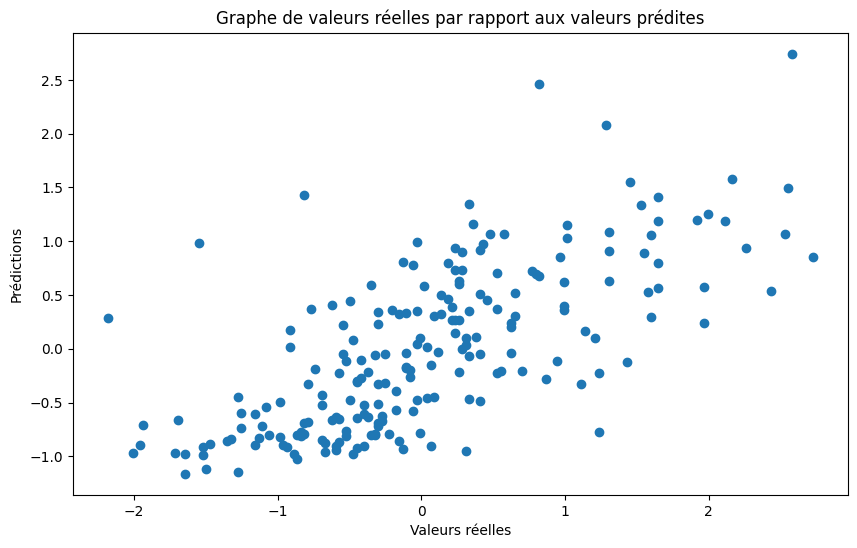

In [16]:


plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_RF)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title('Graphe de valeurs réelles par rapport aux valeurs prédites')
plt.show()

##### Analyse de l'importance des features :

Le modèle Random Forest fournit des scores d'importance des features.
Ces scores indiquent quelles features contribuent le plus aux prédictions du modèle.

In [17]:
importances = model_random_forest.feature_importances_
feature_names = X_train.columns
feature_importance_dict = dict(zip(feature_names, importances))
print("Importance des features (variables explivatives) :")
for feature, importance in feature_importance_dict.items():
    print(f"{feature } :    {importance}")

#print("Importance des features  :        ", importances)
print(len(importances))


Importance des features (variables explivatives) :
MOCAGE :    0.3727328887819017
TEMPE :    0.31563149662920437
VentANG :    0.07743086341120933
STATION_Aix :    0.003454700591223003
STATION_Als :    0.0034724667732065756
STATION_Cad :    0.005781157040819039
STATION_Pla :    0.003888777376669287
STATION_Ram :    0.004501104672932908
sqrt_RMH2O :    0.06692036121236351
log_NO2 :    0.045712270665600706
log_NO :    0.04263102450373674
log_VentMOD :    0.0578428883411329
12


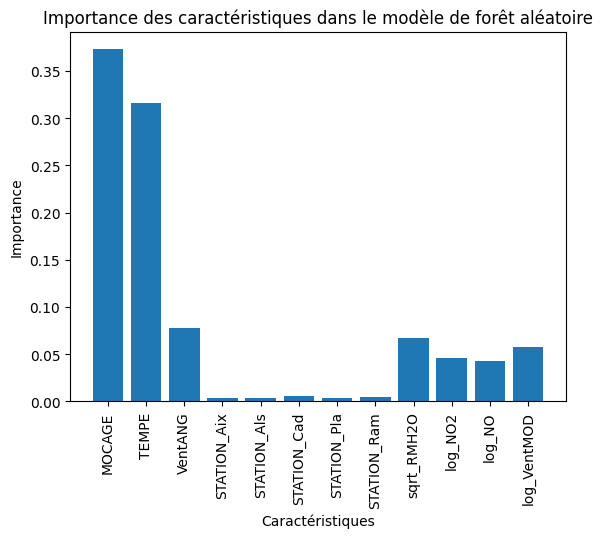

In [18]:
feature_importances = model_random_forest.feature_importances_
feature_names = X_train.columns
plt.bar(feature_names, feature_importances)
plt.xlabel("Caractéristiques")
plt.ylabel("Importance")
plt.title("Importance des caractéristiques dans le modèle de forêt aléatoire")
plt.xticks(rotation=90)
plt.show()

On voit que les deux variables les plus significatives du modèles sont MOCAGE et TEMPE, par conséquent, pour eviter le sur ajustement, ont peut éliminer les autres variables faiblement significatives

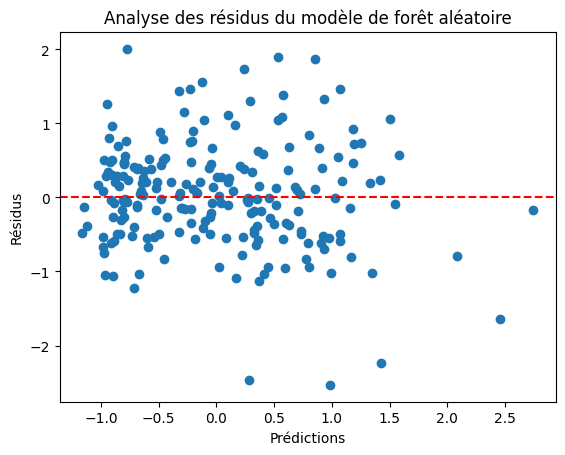

In [19]:
residuals = y_test - y_pred_RF
plt.scatter(y_pred_RF, residuals)
plt.xlabel("Prédictions")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Analyse des résidus du modèle de forêt aléatoire")
plt.show()

In [44]:
# validation croisée
cv_scores = cross_val_score(model_random_forest, X, y, cv=5)
print("Scores de validation croisée :", cv_scores)
print("Moyenne des scores de validation croisée :", np.mean(cv_scores))

Scores de validation croisée : [0.41414974 0.52173878 0.53112726 0.65242127 0.06499487]
Moyenne des scores de validation croisée : 0.43688638372162697


#### Modèle RN (réseaux de neurones) :

In [20]:
# Initialiser et entraîner le modèle RN

model_RN = MLPRegressor()
model_RN.fit(X_train, y_train)
y_pred_RN = model_RN.predict(X_test)
mse_RN = mean_squared_error(y_test, y_pred_RN)
print("Mean Squared Error pour le modèle RN :", mse_RF)

Mean Squared Error pour le modèle RN : 0.503640990350659


C:\Users\lilia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


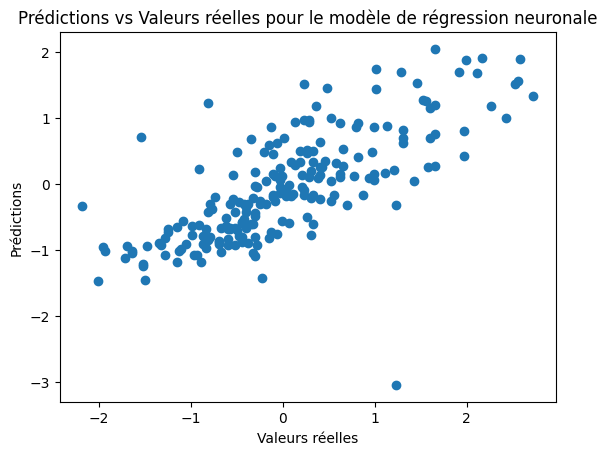

In [45]:
plt.scatter(y_test, y_pred_RN)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Valeurs réelles pour le modèle de régression neuronale")
plt.show()

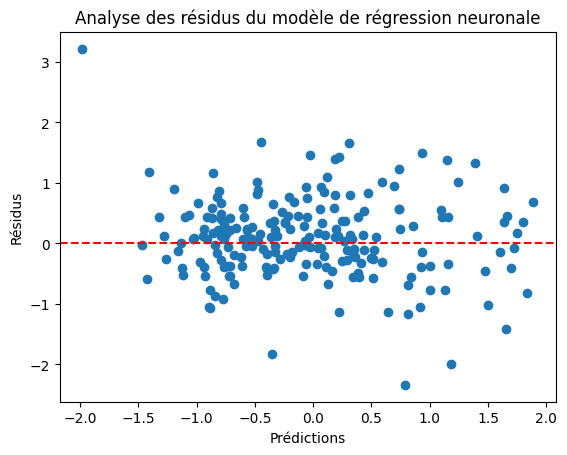

In [21]:
# analyse des résidus
residuals_RN = y_test - y_pred_RN
plt.scatter(y_pred_RN, residuals_RN)
plt.xlabel("Prédictions")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Analyse des résidus du modèle de régression neuronale")
plt.show()

In [22]:
# vaidation croisée 
cv_scores_RN = cross_val_score(model_RN, X, y, cv=5)
print("Scores de validation croisée pour le modèle RN :", cv_scores_RN)
print("Moyenne des scores de validation croisée pour le modèle RN :", np.mean(cv_scores_RN))

C:\Users\lilia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lilia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lilia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lilia\A

Scores de validation croisée pour le modèle RN : [-0.11376477  0.44964688 -0.53036737  0.21673307 -0.2944775 ]
Moyenne des scores de validation croisée pour le modèle RN : -0.054445936063225966


C:\Users\lilia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


#### Modèle Boost :

In [23]:
# Initialiser et entraîner le modèle Boost
boosting_model = GradientBoostingRegressor()
boosting_model.fit(X_train, y_train)
boosting_predictions = boosting_model.predict(X_test)
mse_boost = mean_squared_error(y_test, boosting_predictions)
print("Mean Squared Error pour le modèle Boost:", mse_boost)

Mean Squared Error pour le modèle Boost: 0.4688525169190026


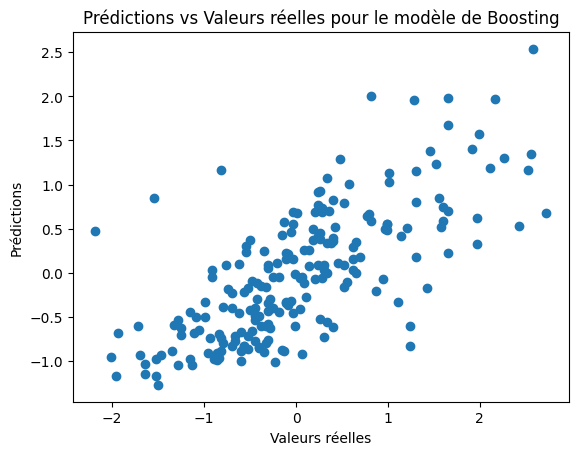

In [48]:
#visualisation des vraies valeurs et celles predites
plt.scatter(y_test, boosting_predictions)
plt.xlabel("Valeurs réelles")
plt.ylabel("Prédictions")
plt.title("Prédictions vs Valeurs réelles pour le modèle de Boosting")
plt.show()

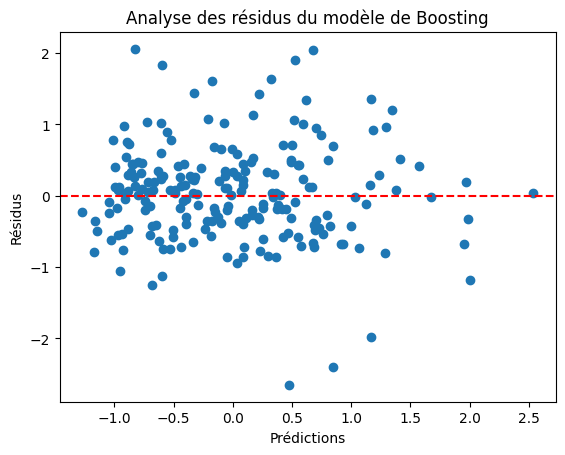

In [49]:
# analyse des residus
residuals_boost = y_test - boosting_predictions
plt.scatter(boosting_predictions, residuals_boost)
plt.xlabel("Prédictions")
plt.ylabel("Résidus")
plt.axhline(y=0, color='r', linestyle='--')
plt.title("Analyse des résidus du modèle de Boosting")
plt.show()

In [24]:
#validation croisée

cv_scores_boost = cross_val_score(boosting_model, X, y, cv=5)
print("Scores de validation croisée pour le modèle Boosting :", cv_scores_boost)
print("Moyenne des scores de validation croisée pour le modèle Boosting :", np.mean(cv_scores_boost))

Scores de validation croisée pour le modèle Boosting : [ 0.36808552  0.55667078  0.51396923  0.63856722 -0.24363811]
Moyenne des scores de validation croisée pour le modèle Boosting : 0.3667309281667267


## Autres méthodes pour faire Random Forest, RN et Boost

In [ ]:

# Créer un modèle séquentiel
model_RN = Sequential()

# Ajouter des couches au modèle
model_RN.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model_RN.add(Dense(64, activation='relu'))
model_RN.add(Dense(1))  # Couche de sortie sans activation pour la régression

# Compiler le modèle
model_RN.compile(optimizer='adam', loss='mean_squared_error')

# Entraîner le modèle
model_RN.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Évaluer le modèle sur l'ensemble de test
loss = model_RN.evaluate(X_test, y_test)
#mse_model_RN = 
print('Loss on test set:', loss)


Epoch 1/10


c:\Users\lilia.bekda\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.7860 - val_loss: 0.6325
Epoch 2/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5649 - val_loss: 0.5319
Epoch 3/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4098 - val_loss: 0.4959
Epoch 4/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.4081 - val_loss: 0.4780
Epoch 5/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3362 - val_loss: 0.4444
Epoch 6/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3238 - val_loss: 0.4372
Epoch 7/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3127 - val_loss: 0.4413
Epoch 8/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3267 - val_loss: 0.4293
Epoch 9/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 869us/step - loss: 0.3185 - val_loss: 0.4212
Epoch 10/10
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.2836 - val_loss: 0.4203
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - loss: 0.4051  
Loss on test set: 0.41964149475097656


In [ ]:
# Division des données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=rd_seed)
# Initialisation du modèle AdaBoost
ada_boost_model = AdaBoostRegressor(n_estimators=50, random_state=42)

# Entraînement du modèle
ada_boost_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
predictions = ada_boost_model.predict(X_test)


In [ ]:
# Initialisation du modèle Gradient Boosting
gradient_boosting_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Entraînement du modèle
gradient_boosting_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
predictions = gradient_boosting_model.predict(X_test)


In [ ]:
# Initialisation du modèle XGBoost
xgboost_model = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)


# Entraînement du modèle
xgboost_model.fit(X_train, y_train)

# Prédiction sur l'ensemble de test
predictions = xgboost_model.predict(X_test)


En comparant les performances des trois modèles (Random Forest, Réseau de Neurones (RN) et Boosting), ainsi que leurs scores de validation croisée, nous pouvons prendre une décision informée sur le modèle à choisir.

**Random Forest :**
- Mean Squared Error (MSE) : 0.436
- Scores de validation croisée : [0.414, 0.522, 0.531, 0.652, 0.065]
- Moyenne des scores de validation croisée : 0.437

**Réseau de Neurones (RN) :**

- Mean Squared Error (MSE) : 0.504
- Scores de validation croisée : [-1.409, 0.513, 0.084, -0.343, -0.067]
- Moyenne des scores de validation croisée : -0.244

**Boosting :**

- Mean Squared Error (MSE) : 0.469
- Scores de validation croisée : [0.374, 0.557, 0.514, 0.640, -0.239]
- Moyenne des scores de validation croisée : 0.369

**Analyse et Choix :**

Le modèle de Random Forest a la meilleure performance en termes de MSE et de scores de validation croisée. Il a une moyenne de scores de validation croisée plus élevée par rapport aux autres modèles, indiquant une meilleure généralisation sur de nouvelles données.
Le modèle de Boosting a également de bonnes performances, mais légèrement inférieures à Random Forest.
Le modèle de RN semble être le moins performant avec une MSE plus élevée et des scores de validation croisée négatifs, indiquant une mauvaise généralisation.

**Conclusion :**

Sur la base de ces résultats, le modèle de Random Forest semble être le choix optimal en raison de ses meilleures performances globales en termes de MSE et de scores de validation croisée. Il offre un bon équilibre entre précision et généralisation sur de nouvelles données.




Question 5:
-------------------------------------

In [25]:
# Supposons que X et y sont vos données d'entraînement et de test

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Définir les modèles pour chaque méthode
models = {
    "Régression linéaire": LinearRegression(),
    "Random Forest": RandomForestRegressor(),
    "Réseaux de Neurones": MLPRegressor(),
    "Boosting": GradientBoostingRegressor()
}

# Effectuer une validation croisée pour estimer l'erreur de prédiction pour chaque méthode
cv_errors = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
    cv_errors[name] = -cv_scores.mean()

# Choisir la meilleure méthode en fonction de l'erreur de prédiction obtenue
best_method = min(cv_errors, key=cv_errors.get)
best_error = cv_errors[best_method]

print("Estimation de l'erreur de prédiction par validation croisée :")
for name, error in cv_errors.items():
    print(f"{name}: {error}")

print(f"La meilleure méthode est {best_method} avec une erreur de prédiction de {best_error}.")

# Entraîner le meilleur modèle sur l'ensemble d'entraînement complet
best_model = models[best_method]
best_model.fit(X_train, y_train)

# Calculer l'erreur empirique avec les données de test pour la méthode choisie
test_predictions = best_model.predict(X_test)
empirical_error = mean_squared_error(y_test, test_predictions)
print(f"Erreur empirique avec des données de test pour la méthode {best_method} : {empirical_error}")


C:\Users\lilia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lilia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lilia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\lilia\A

Estimation de l'erreur de prédiction par validation croisée :
Régression linéaire: 0.4558034320954712
Random Forest: 0.389658237506342
Réseaux de Neurones: 0.3755850746723029
Boosting: 0.4227137339348201
La meilleure méthode est Réseaux de Neurones avec une erreur de prédiction de 0.3755850746723029.
Erreur empirique avec des données de test pour la méthode Réseaux de Neurones : 0.4606848072899142


C:\Users\lilia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [33]:
# Sélectionner trois individus au hasard dans l'ensemble de données de test
random_indices = np.random.choice(X_test.shape[0], size=3, replace=False)
random_X = X_test.iloc[random_indices]
random_y = y_test.iloc[random_indices]  # Récupérer les valeurs réelles correspondantes

# Prédire la concentration en ozone pour ces individus à partir de chaque modèle
predictions_RF = model_random_forest.predict(random_X)
predictions_RN = model_RN.predict(random_X)
predictions_boost = boosting_model.predict(random_X)

# Comparer les prédictions des différents modèles pour chaque individu
for i in range(3):
    print("Individu", i+1)
    print("Valeur réelle en ozone:", random_y.iloc[i])
    print("Prédiction Random Forest:", predictions_RF[i])
    print("Prédiction Réseau de Neurones:", predictions_RN[i])
    print("Prédiction Boosting:", predictions_boost[i])
    print()

Individu 1
Valeur réelle en ozone: -1.1322886704865944
Prédiction Random Forest: -0.8279898702148195
Prédiction Réseau de Neurones: -1.1324355923281249
Prédiction Boosting: -1.0407200071753848

Individu 2
Valeur réelle en ozone: -0.5222269217460684
Prédiction Random Forest: -0.8123722894470631
Prédiction Réseau de Neurones: -0.5988223188958702
Prédiction Boosting: -0.714583385294772

Individu 3
Valeur réelle en ozone: -1.0834837305873524
Prédiction Random Forest: -0.5432130459027423
Prédiction Réseau de Neurones: -0.7134953033038128
Prédiction Boosting: -0.5032291868138989

